<a href="https://colab.research.google.com/github/JunyuYan/Pytorch-Learning-Materials/blob/main/pytorch_official/Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data does not always in the format that is suitable for training machine learning models. So we can use some transforms to convert data into the form of the model training.

All TorchVision Datasets have two parameters for transforms:


> transform: transform features


> target_transform: transform labels

torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.






In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # ToTensor coverts a PIL image or numpy ndarray into a FloatTensor, and scales the image into the pixel range [0,1]
    # Turn the integer into a one-hot encoded tensor.
    # First create a tensor of size 10 (the number of labels) and calls scatter_ which assigns a value=1 on the index as given by label y
    target_transform=Lambda(lambda y: torch.zeros(10,
      dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

)

100%|██████████| 26421880/26421880 [00:03<00:00, 6902164.21it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 119468.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2175581.83it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4881817.09it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



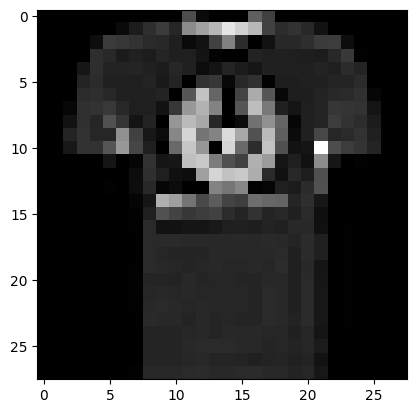

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [8]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

train_data = DataLoader(ds, batch_size=64, shuffle=True)

img, label = next(iter(train_data))
plt.imshow(img[0].squeeze(), cmap="gray")
plt.show()
print(label[0])